In [1]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd 
import numpy as np
from glob import glob 

pd.set_option('display.float_format', '{:.1f}'.format)


path = 'dataset/seoul_subway/seoul_subway_year_concat/subway'
file_names = sorted(glob(path+'*.csv'))

df = []
for file in file_names:
    df.append(pd.read_csv(file, index_col=0))
    
df = pd.concat(df, ignore_index = True)

In [3]:
df

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,2017-01-01,2호선,봉천,11169.0,11198.0
1,2017-01-01,2호선,신림,40137.0,42005.0
2,2017-01-01,2호선,신대방,16033.0,16054.0
3,2017-01-01,2호선,구로디지털단지,28246.0,28497.0
4,2017-01-01,2호선,대림(구로구청),20946.0,21926.0
...,...,...,...,...,...
1237080,2022-09-30,경춘선,춘천,2505.0,1722.0
1237081,2022-09-30,공항철도 1호선,서울역,12725.0,11573.0
1237082,2022-09-30,공항철도 1호선,공덕,2803.0,3699.0
1237083,2022-09-30,공항철도 1호선,홍대입구,12609.0,13478.0


In [4]:
df['사용일자'] = pd.to_datetime(df['사용일자'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237085 entries, 0 to 1237084
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   사용일자    1237085 non-null  datetime64[ns]
 1   노선명     1237085 non-null  object        
 2   역명      1237085 non-null  object        
 3   승차총승객수  1237085 non-null  float64       
 4   하차총승객수  1237085 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 47.2+ MB


In [5]:
df['노선명'].value_counts()

5호선         110276
2호선         104950
7호선         104857
경부선          81806
6호선          78833
분당선          72029
3호선          70735
경원선          61458
4호선          54574
경의선          54356
9호선          52475
중앙선          44059
경인선          41980
경춘선          39881
8호선          35970
수인선          31032
공항철도 1호선     28373
안산선          27287
우이신설선        24115
경강선          23087
일산선          21159
1호선          20990
9호선2~3단계     18187
과천선          16792
장항선          12930
9호선2단계        3508
신림선           1386
Name: 노선명, dtype: int64

- 9호선의 경우 3단계에 걸쳐 연장 완공된 노선이다. 따라서 9호선으로 변수명 통일 

In [6]:
df['노선명'] = df['노선명'].str.replace('9호선2단계','9호선').str.replace('9호선2~3단계','9호선')

In [7]:
df['연도'] = df['사용일자'].dt.year
df['월'] = df['사용일자'].dt.month
df['연도월'] = df['연도'].astype(str)+'-'+df['월'].astype(str)
df['일'] = df['사용일자'].dt.day
df['요일'] = df['사용일자'].dt.dayofweek.map(lambda x : '월화수목금토일'[x])
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,연도,월,연도월,일,요일
0,2017-01-01,2호선,봉천,11169.0,11198.0,2017,1,2017-1,1,일
1,2017-01-01,2호선,신림,40137.0,42005.0,2017,1,2017-1,1,일
2,2017-01-01,2호선,신대방,16033.0,16054.0,2017,1,2017-1,1,일
3,2017-01-01,2호선,구로디지털단지,28246.0,28497.0,2017,1,2017-1,1,일
4,2017-01-01,2호선,대림(구로구청),20946.0,21926.0,2017,1,2017-1,1,일
...,...,...,...,...,...,...,...,...,...,...
1237080,2022-09-30,경춘선,춘천,2505.0,1722.0,2022,9,2022-9,30,금
1237081,2022-09-30,공항철도 1호선,서울역,12725.0,11573.0,2022,9,2022-9,30,금
1237082,2022-09-30,공항철도 1호선,공덕,2803.0,3699.0,2022,9,2022-9,30,금
1237083,2022-09-30,공항철도 1호선,홍대입구,12609.0,13478.0,2022,9,2022-9,30,금


In [10]:
df['노선_역명'] = df['노선명']+'_'+df['역명']

### 연도에 따른 승,하차 승객수 변화

<AxesSubplot:xlabel='연도월'>

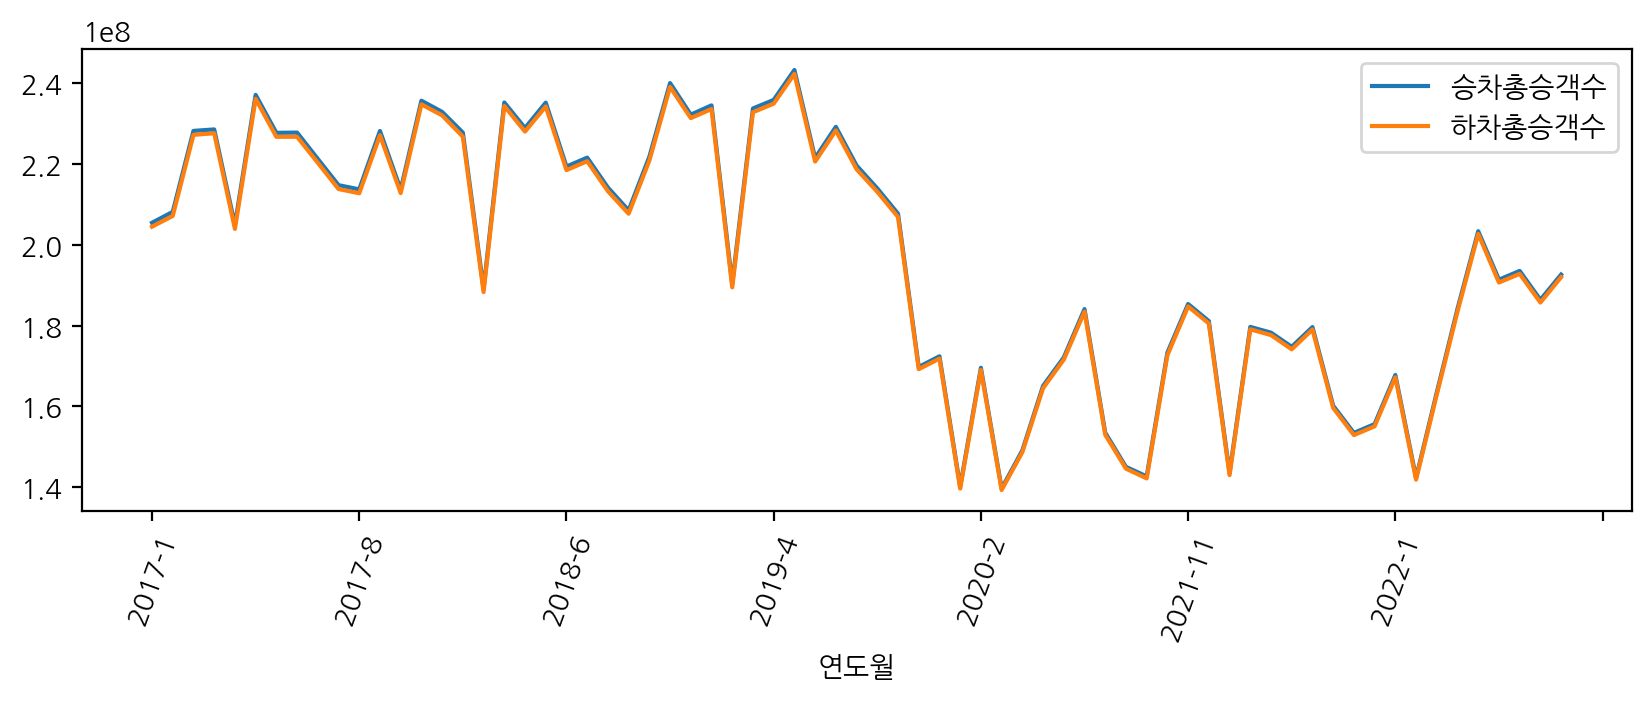

In [11]:
df.groupby(['연도월'])[['승차총승객수','하차총승객수']].sum().plot(figsize=(10,3),rot=70)

### 총 승객수 계산 
- 승하차 인원 차이가 그렇게 크지 않아서 총 승객수로 데이터를 분석하기로 결정. 

In [12]:
df['총이용자수'] = df['승차총승객수'] + df['하차총승객수']

In [16]:
df_count = df.groupby(['노선_역명'])['총이용자수'].sum().sort_values(ascending=False)
df_station = [i for i in df_count[:20].index]
df_station

['2호선_강남',
 '2호선_잠실(송파구청)',
 '2호선_홍대입구',
 '2호선_신림',
 '2호선_구로디지털단지',
 '2호선_신도림',
 '2호선_삼성(무역센터)',
 '3호선_고속터미널',
 '2호선_서울대입구(관악구청)',
 '2호선_선릉',
 '1호선_서울역',
 '2호선_역삼',
 '경부선_영등포',
 '2호선_을지로입구',
 '경부선_수원',
 '2호선_신촌',
 '2호선_건대입구',
 '2호선_사당',
 '2호선_강변(동서울터미널)',
 '7호선_가산디지털단지']

In [18]:
df_count = df.groupby(['노선_역명'])['총이용자수'].sum().sort_values(ascending=False)
df_station_l = [i for i in df_count[-20:].index]
df_station_l

['신림선_샛강',
 '신림선_서울지방병무청',
 '신림선_신림',
 '장항선_탕정',
 '신림선_보라매공원',
 '신림선_대방',
 '수인선_야목',
 '수인선_달월',
 '중앙선_지평',
 '경원선_옥수',
 '경의선_임진강',
 '3호선_충무로',
 '6호선_연신내',
 '분당선_복정',
 '경원선_창동',
 '경의선_계양',
 '경의선_김포공항',
 '6호선_신내',
 '일산선_지축',
 '경의선_검암']

In [23]:
df_top20 = df[df['노선_역명'].isin(df_station)]

In [22]:
df_bottom20 = df[df['노선_역명'].isin(df_station_l)]

# 코로나 이전 / 이후 각 연도별 지하철 이용 변화 데이터 분석
- 서울시 공공데이터 활용 
- 5년간 총 승하차인원수가 가장 많았던 20개의 역을 기준으로 시각화 

In [25]:
df_top20.describe()

,승차총승객수,하차총승객수,연도,월,일,총이용자수
count,41980.0,41980.0,41980.0,41980.0,41980.0,41980.0
mean,49447.5,49758.7,2019.4,6.3,15.7,99206.2
std,20592.1,20660.1,1.7,3.4,8.8,41106.8
min,3635.0,3585.0,2017.0,1.0,1.0,7546.0
25%,35208.0,35730.5,2018.0,3.0,8.0,70927.5
50%,48067.0,49310.0,2019.0,6.0,16.0,97363.5
75%,60492.8,60058.0,2021.0,9.0,23.0,121217.0
max,152285.0,143134.0,2022.0,12.0,31.0,295419.0


In [26]:
df_top20.describe(include='object')

,노선명,역명,연도월,요일,노선_역명
count,41980,41980,41980,41980,41980
unique,5,20,69,7,20
top,2호선,신림,2017-1,일,2호선_신림
freq,31485,2099,620,6000,2099


In [27]:
df_top20.pivot_table(index=['연도월'],columns='역명',values=['총이용자수'],aggfunc='sum').reset_index()

연도월     총이용자수                                                     \
역명            가산디지털단지        강남 강변(동서울터미널)      건대입구     고속터미널   구로디지털단지   
0    2017-1 2360621.0 6269249.0  2859765.0 2736982.0 3522453.0 3689820.0   
1   2017-10 2005716.0 5252945.0  2864331.0 2678925.0 3443355.0 3431202.0   
2   2017-11 2481046.0 6050327.0  2919002.0 2860808.0 3590409.0 3912538.0   
3   2017-12 2347091.0 6405425.0  3018431.0 2967250.0 3992611.0 3899470.0   
4    2017-2 2352806.0 6283088.0  2798608.0 2730086.0 3538472.0 3655536.0   
..      ...       ...       ...        ...       ...       ...       ...   
64   2022-5 2256537.0 4699331.0  1933033.0 2400907.0 2899699.0 3247139.0   
65   2022-6 2178871.0 4385926.0  1828174.0 2144078.0 2699097.0 3140268.0   
66   2022-7 2237951.0 4714847.0  1882446.0 2197950.0 2830880.0 3213075.0   
67   2022-8 2172534.0 4366628.0  1829675.0 2088074.0 2685529.0 3110136.0   
68   2022-9 2139498.0 4146399.0  1820911.0 2134231.0 2778132.0 3072783.0   

                                    ...                                \
역명        사당  삼성(무역센터) 서울대입구(관악구청)  ...        선릉        수원       신도림   
0  2565888.0 3300110.0   2977734.0  ... 2937941.0 2562470.0 3545123.0   
1  2489168.0 2934831.0   2892828.0  ... 2534543.0 2975275.0 3425518.0   
2  2817120.0 3639203.0   3254875.0  ... 3179998.0 2953527.0 3775725.0   
3  2939435.0 4012445.0   3200606.0  ... 3132268.0 2972470.0 3859801.0   
4  2603050.0 3239042.0   2964425.0  ... 2973360.0 2466538.0 3533926.0   
..       ...       ...         ...  ...       ...       ...       ...   
64 2442221.0 2882052.0   2809402.0  ... 2790654.0 2577667.0 2881120.0   
65 2347600.0 2913618.0   2588133.0  ... 2728672.0 2299101.0 2742250.0   
66 2348783.0 3173403.0   2654379.0  ... 2841926.0 2289764.0 2747582.0   
67 2207410.0 2949392.0   2546031.0  ... 2754781.0 2170884.0 2647899.0   
68 2263696.0 2791394.0   2592179.0  ... 2650768.0 2399212.0 2668178.0   

                                                                          
역명        신림        신촌        역삼       영등포     을지로입구  잠실(송파구청)      홍대입구  
0  4123559.0 2936187.0 2810352.0 3146065.0 2937740.0 5003746.0 4916121.0  
1  3896310.0 2709569.0 2366843.0 2964481.0 2652547.0 5012599.0 4720581.0  
2  4285559.0 3119532.0 3033489.0 3082529.0 3097817.0 5226906.0 4789051.0  
3  4379636.0 3187026.0 2982031.0 3372705.0 3212650.0 5869276.0 5351202.0  
4  4088388.0 2974861.0 2853282.0 3005130.0 2950455.0 4913694.0 5059596.0  
..       ...       ...       ...       ...       ...       ...       ...  
64 3672714.0 2103889.0 2794788.0 2514443.0 2218499.0 4370273.0 3881460.0  
65 3276651.0 1975776.0 2779568.0 2422595.0 2159081.0 4070990.0 3594575.0  
66 3319210.0 2118774.0 2871125.0 2529718.0 2292154.0 4450302.0 3934310.0  
67 3181549.0 2007517.0 2826108.0 2392563.0 2267361.0 4199802.0 3745286.0  
68 3127428.0 2163947.0 2685919.0 2391986.0 2269404.0 4102895.0 3701586.0  

[69 rows x 21 columns]

Text(0.5, 1.0, '연간 상위 20개역 지하철 이용자수 변화')

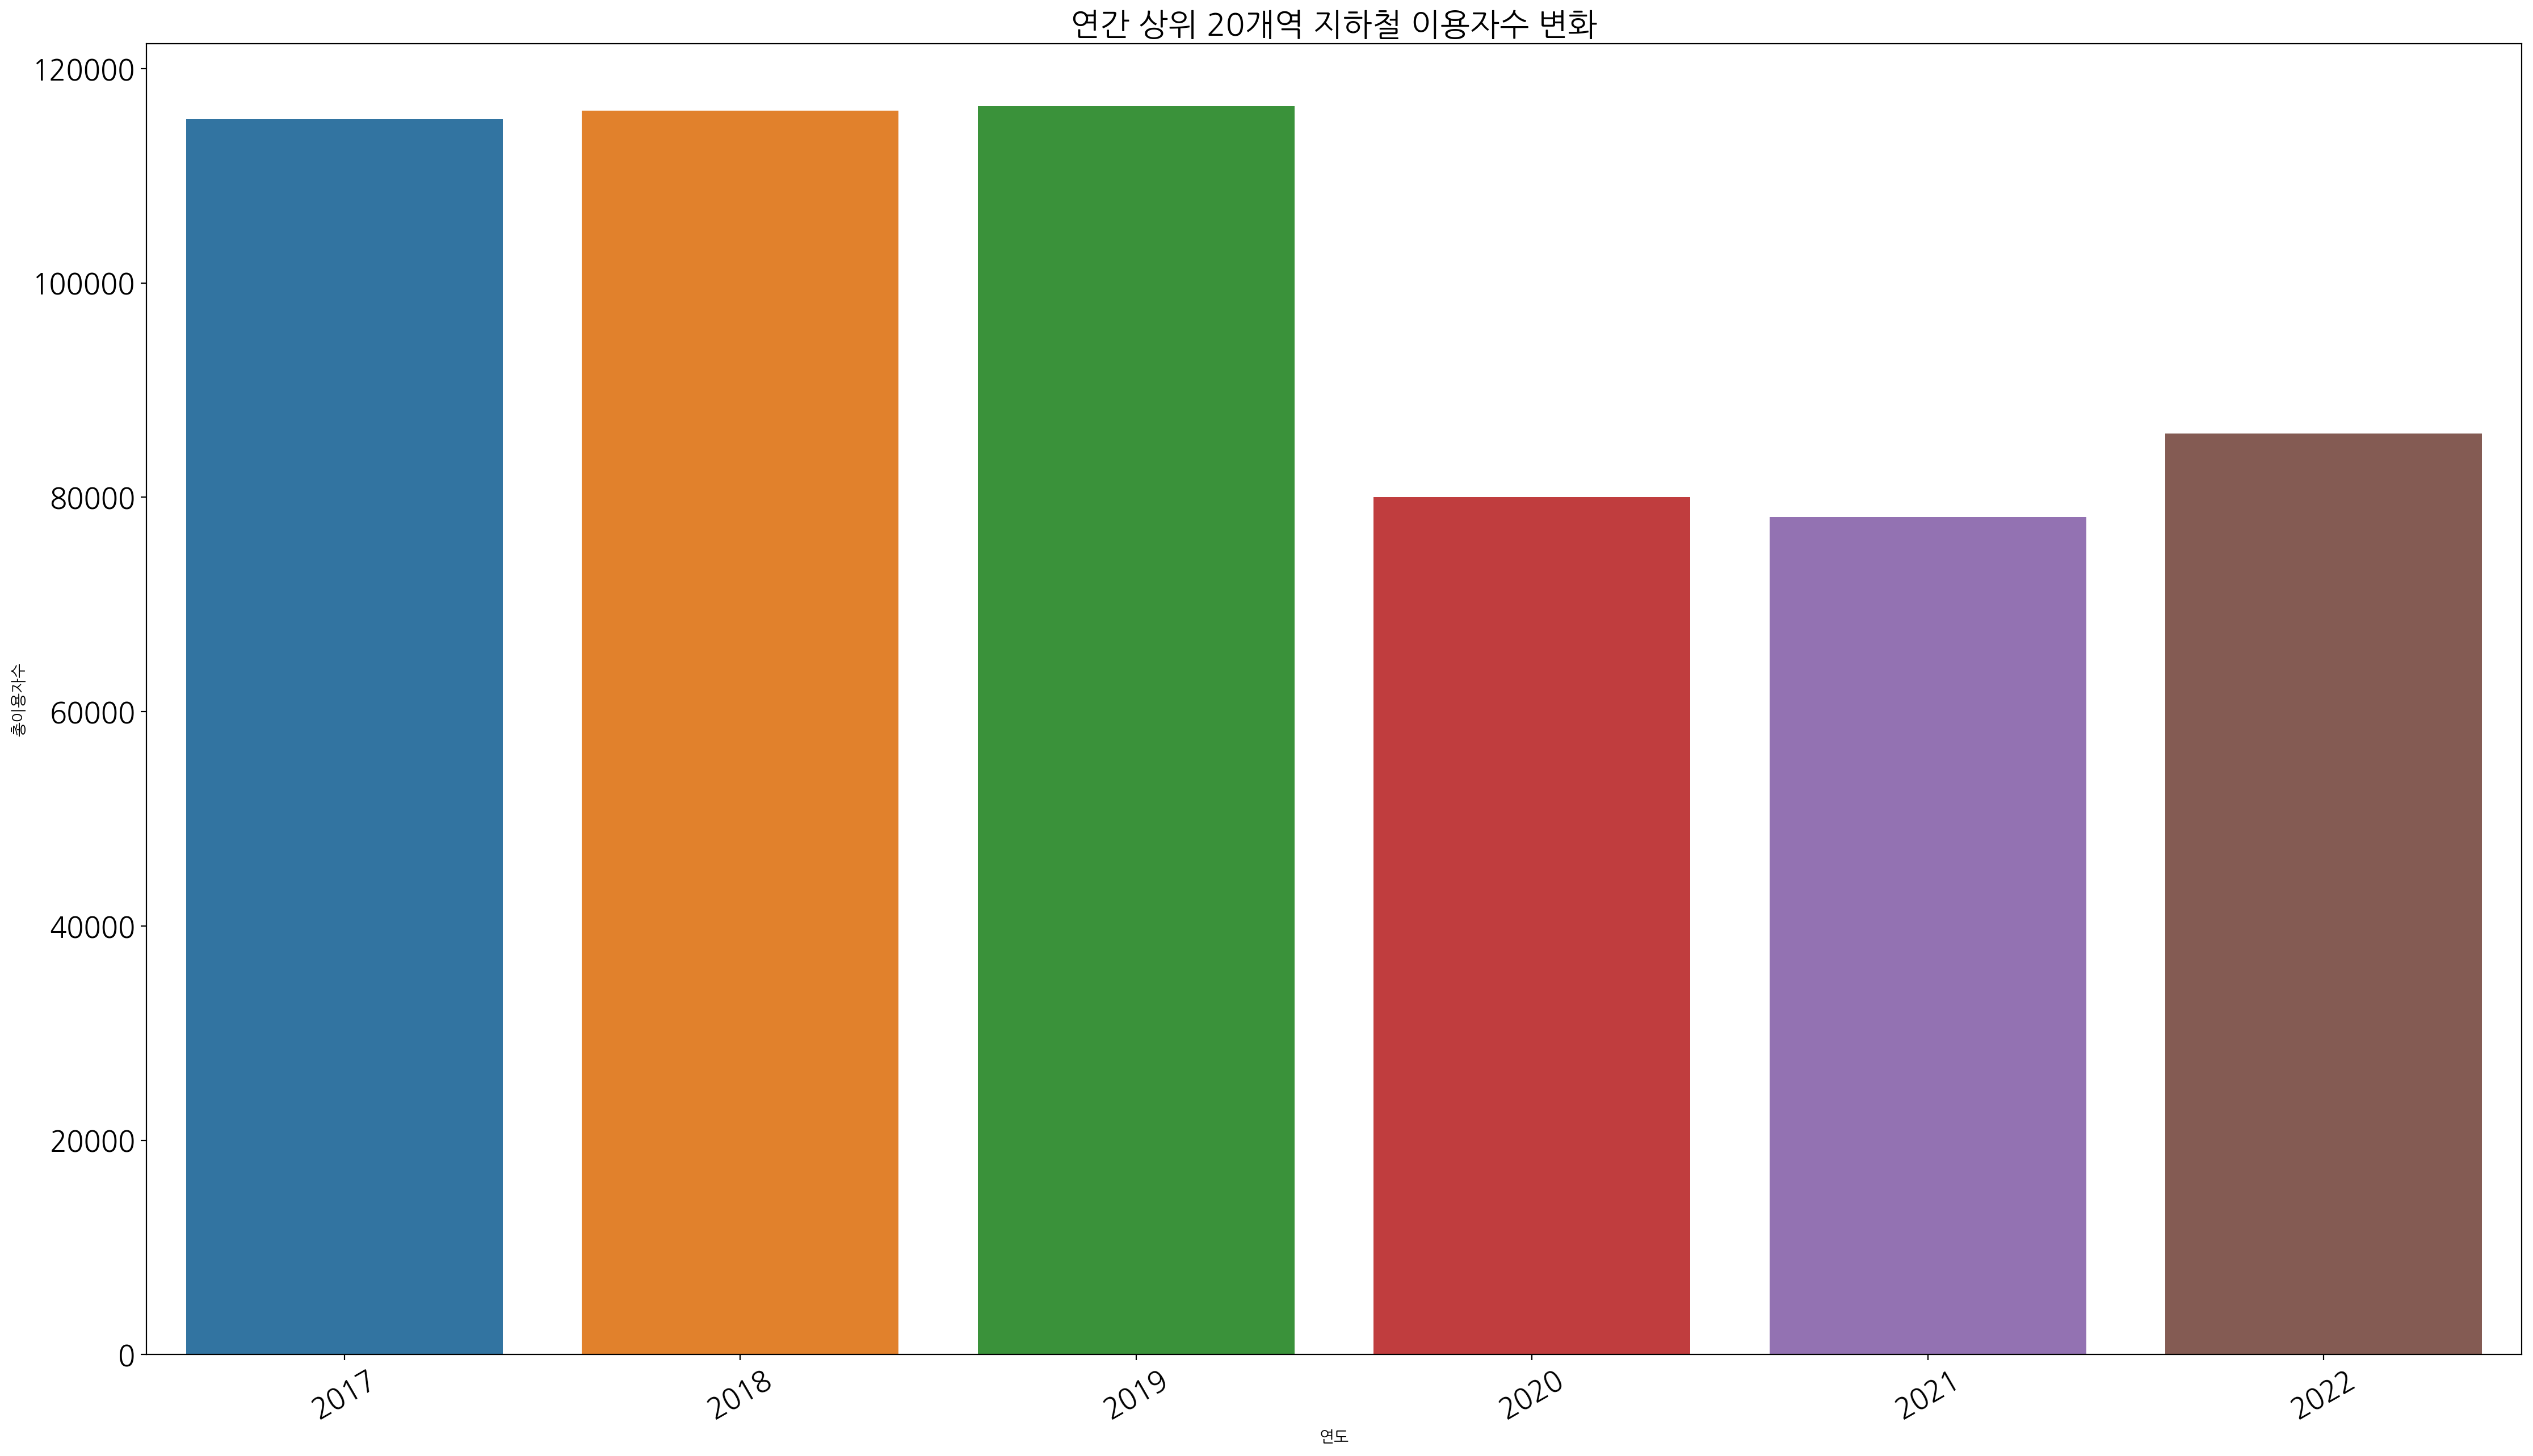

In [28]:
#시간대별 승차 인원
plt.figure(figsize=(27,15))
sns.barplot(data=df_top20,x='연도',y = '총이용자수',ci=False)
plt.xticks(rotation=30,fontsize=18)
plt.yticks(fontsize=18)
plt.title('연간 상위 20개역 지하철 이용자수 변화',fontsize = 20)

Text(0.5, 1.0, '연간 하위 20개역 지하철 이용자수 변화')

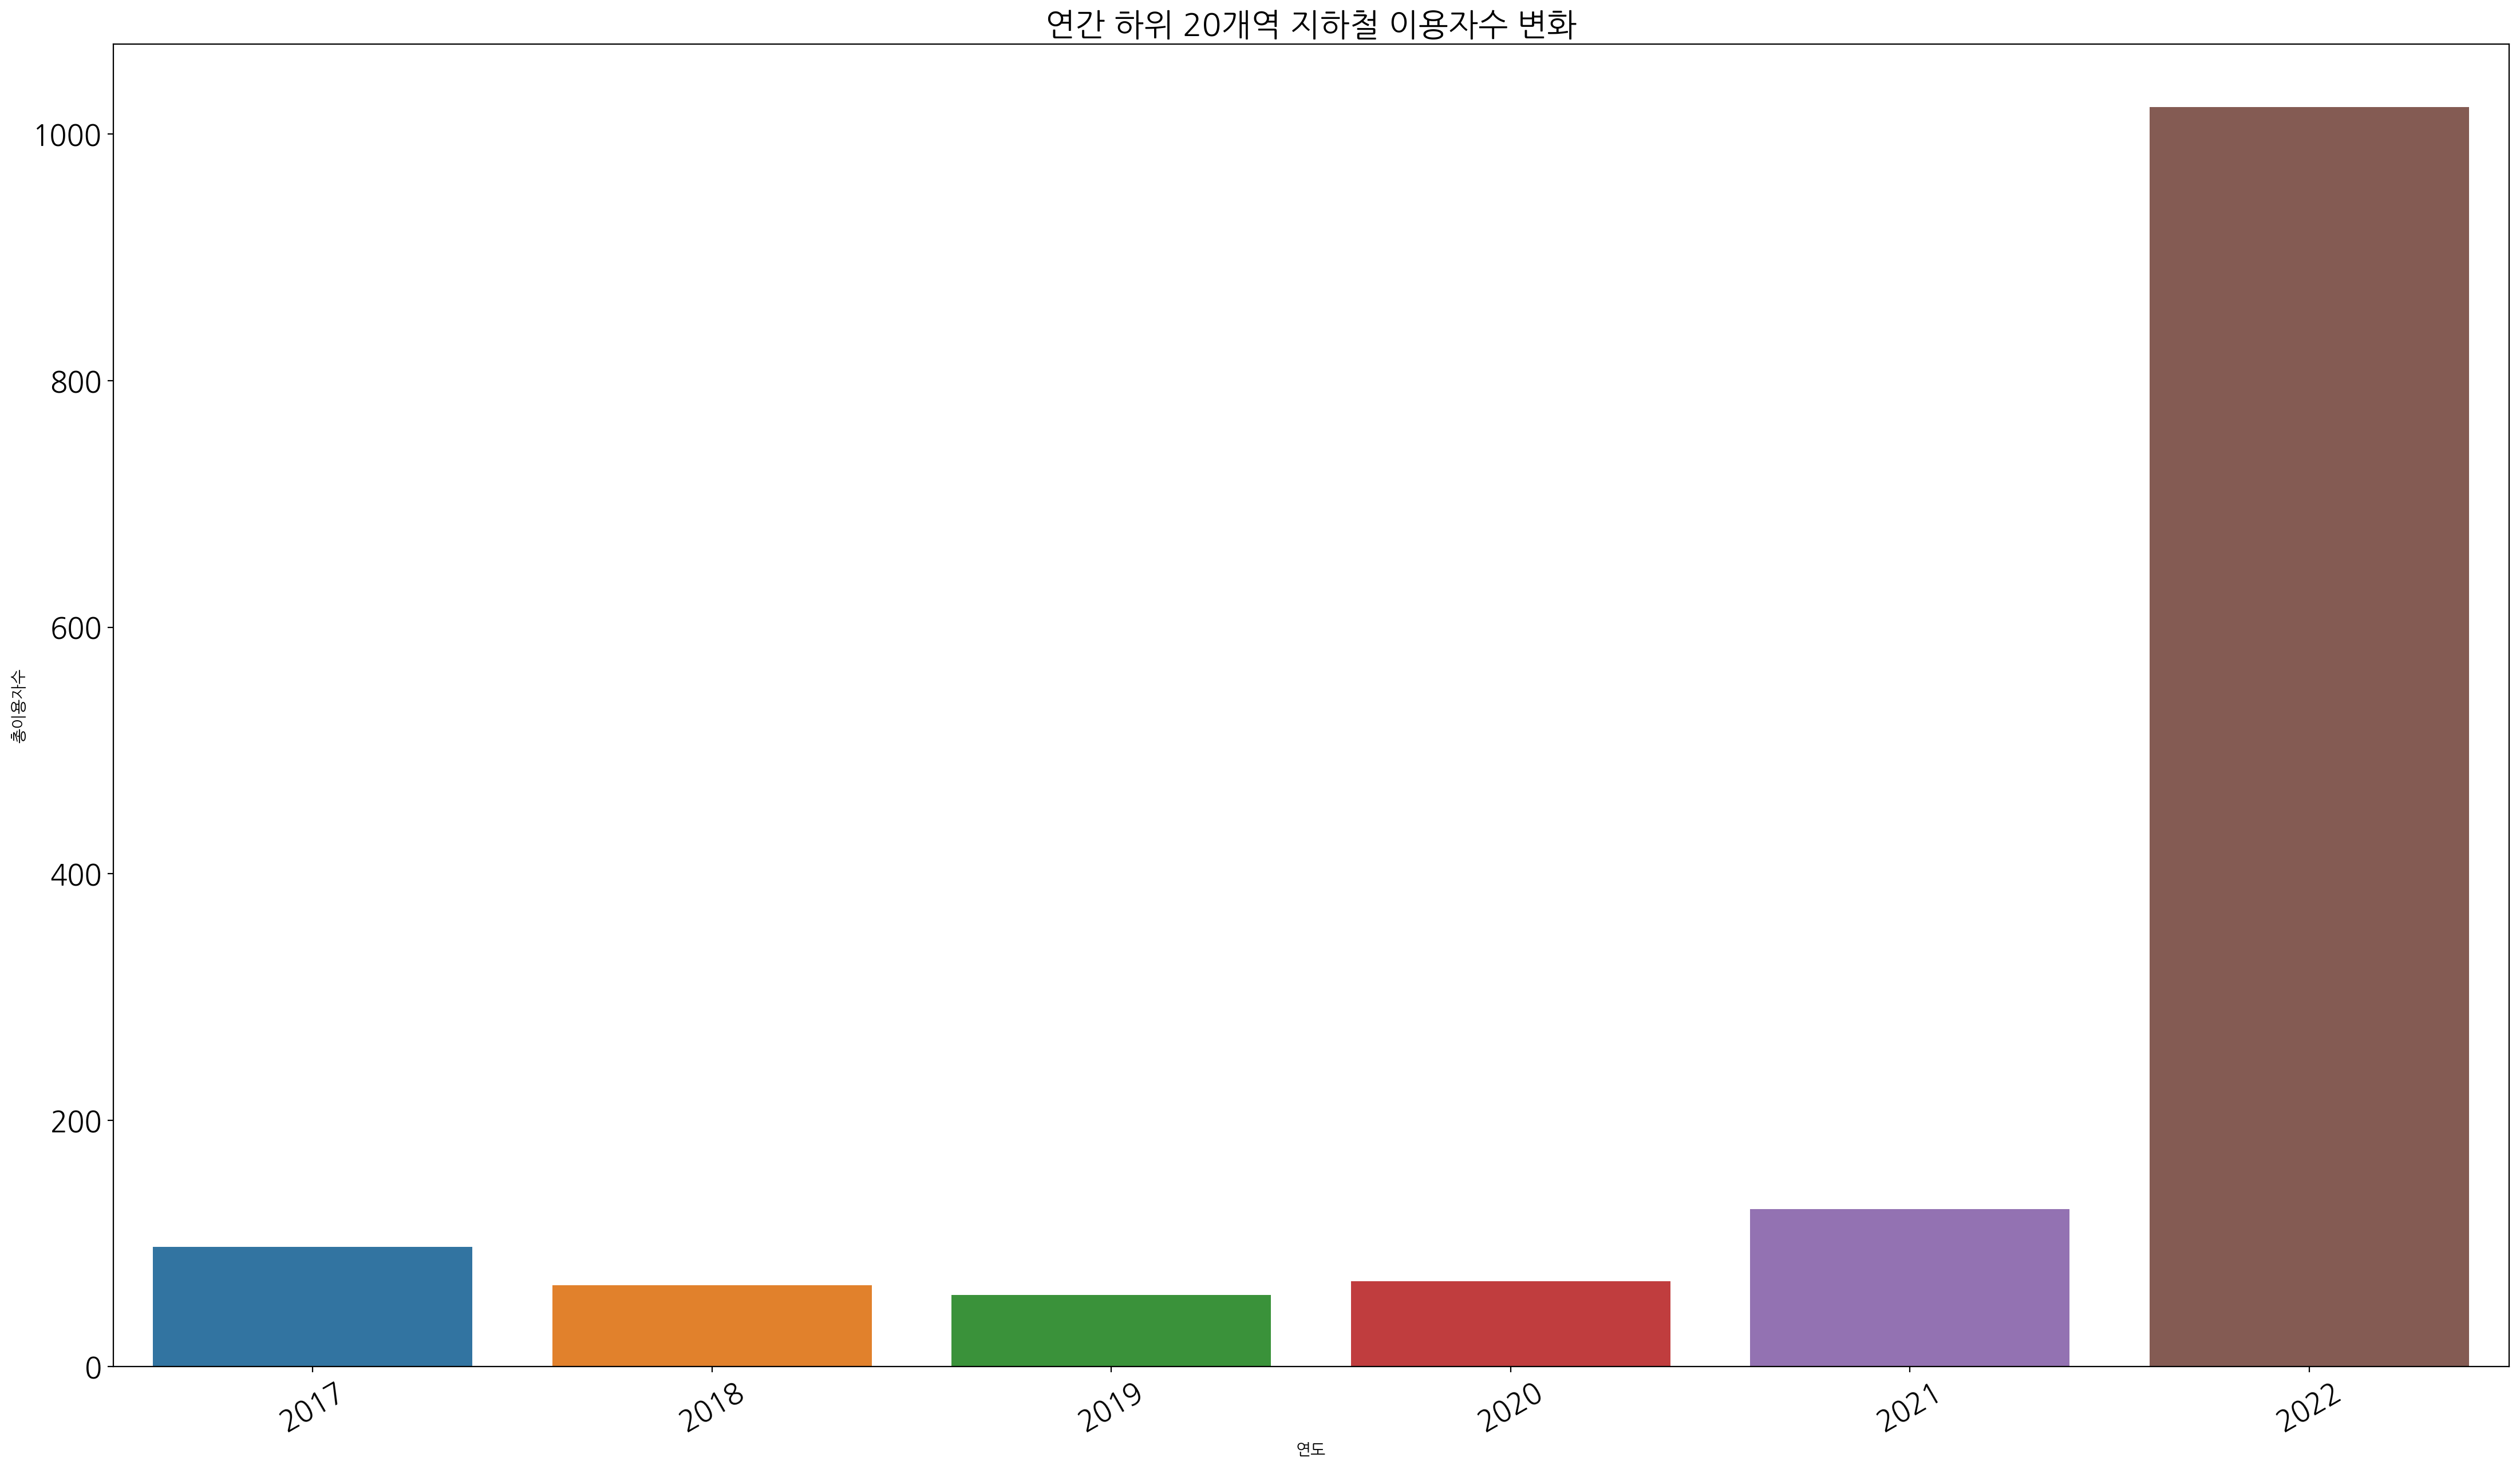

In [29]:
plt.figure(figsize=(27,15))
sns.barplot(data=df_bottom20,x='연도',y = '총이용자수',ci=False)
plt.xticks(rotation=30,fontsize=18)
plt.yticks(fontsize=18)
plt.title('연간 하위 20개역 지하철 이용자수 변화',fontsize = 20)

<AxesSubplot:title={'center':'총 이용자 수'}, xlabel='노선_역명', ylabel='총이용자수'>

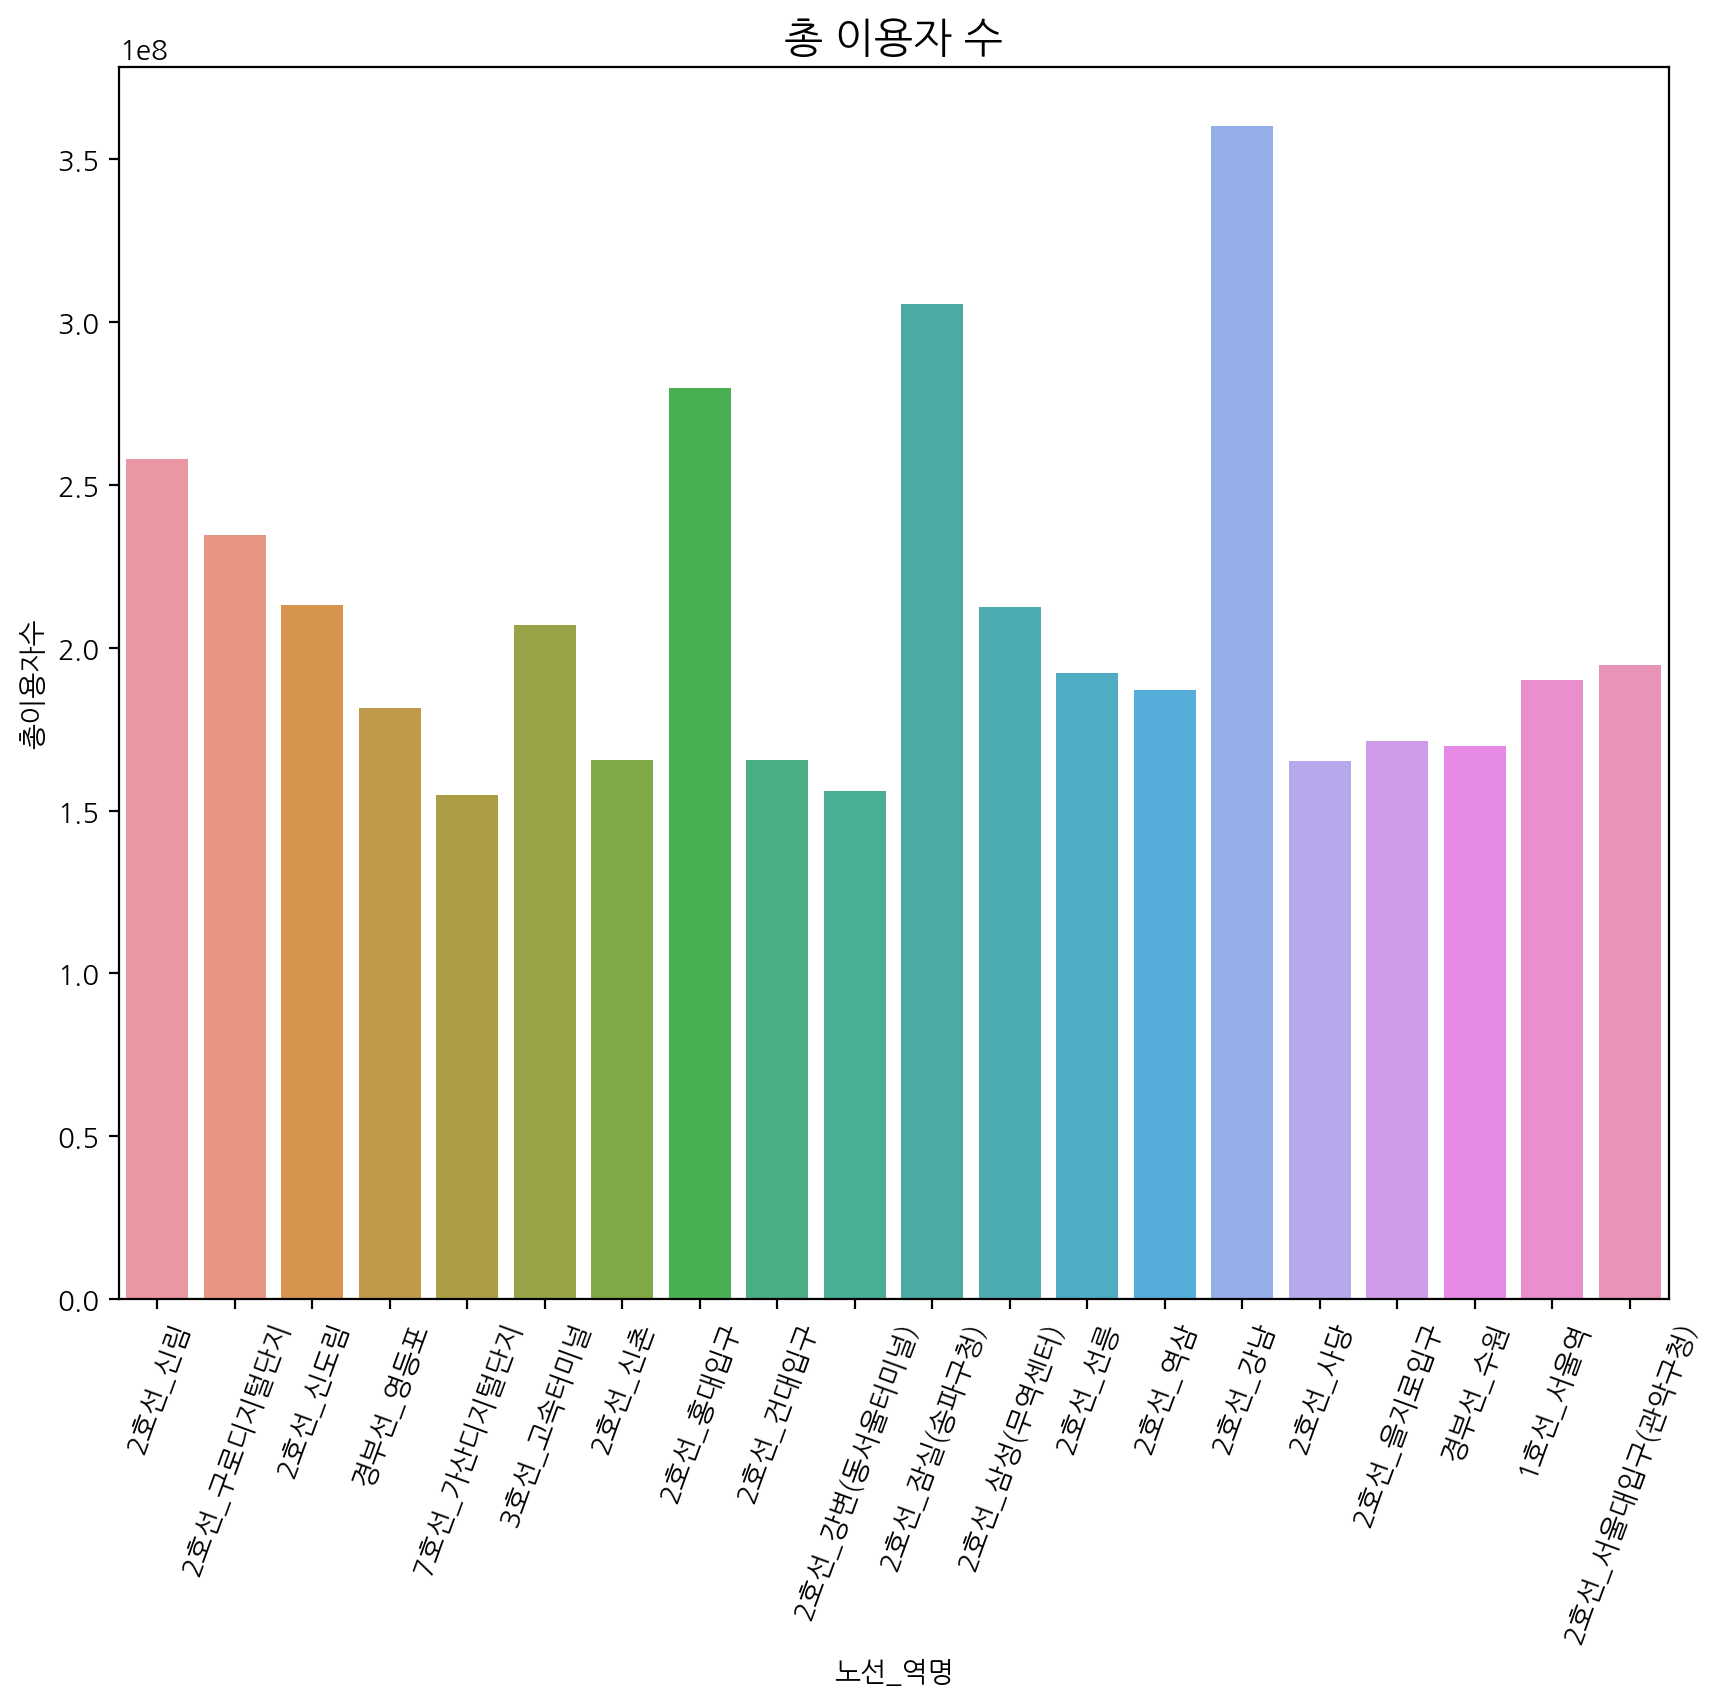

In [35]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=70)
plt.title('총 이용자 수',fontsize=15)
sns.barplot(data=df_top20, x='노선_역명', y='총이용자수',ci=None,estimator=sum)

<AxesSubplot:title={'center':'총 이용자 수'}, xlabel='월', ylabel='총이용자수'>

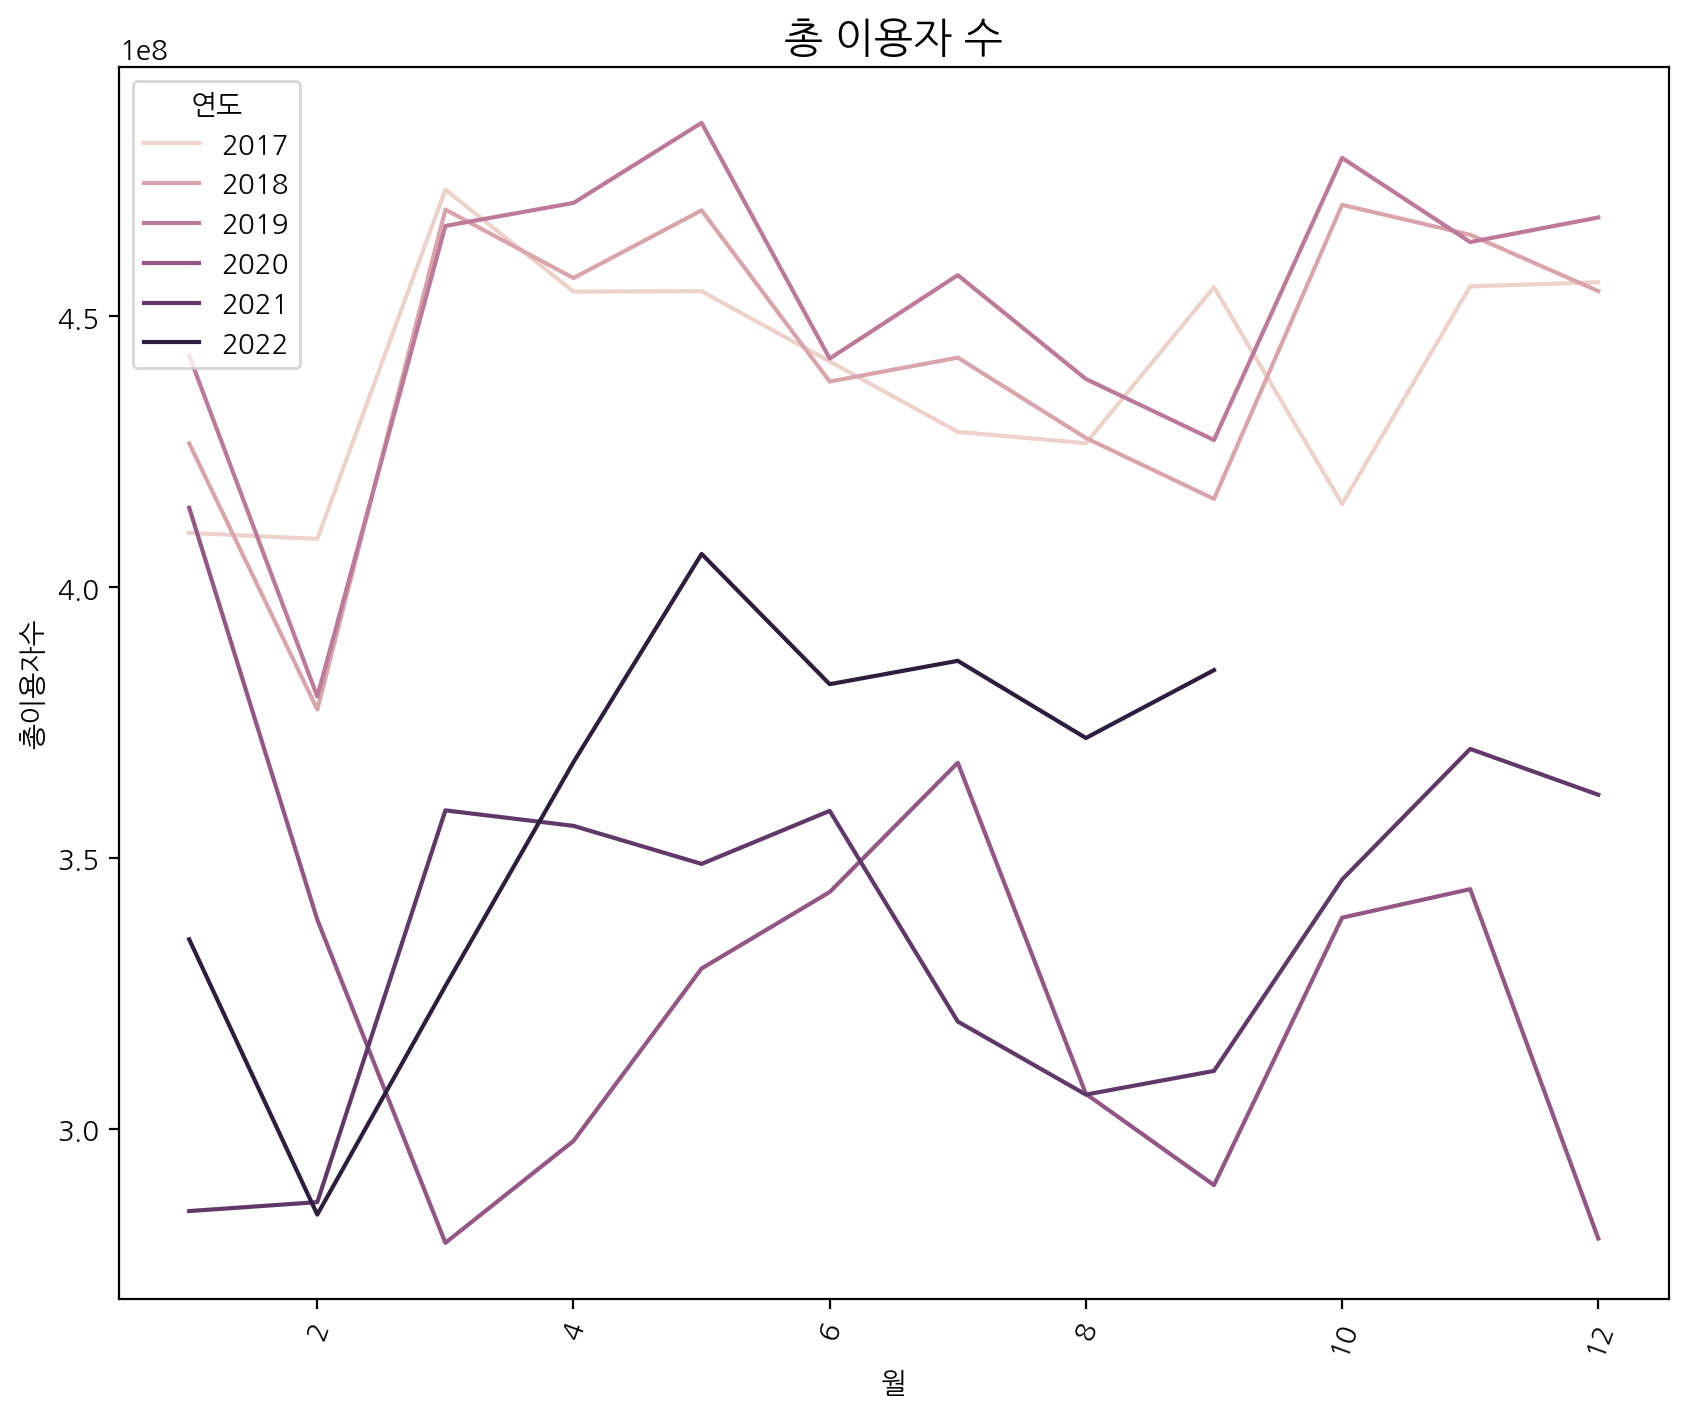

In [111]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=70)
plt.title('총 이용자 수',fontsize=15)
sns.lineplot(data=df, x='월', y='총이용자수',hue='연도',ci=None,estimator=sum)

<AxesSubplot:title={'center':'총 이용자 수'}, xlabel='노선_역명', ylabel='총이용자수'>

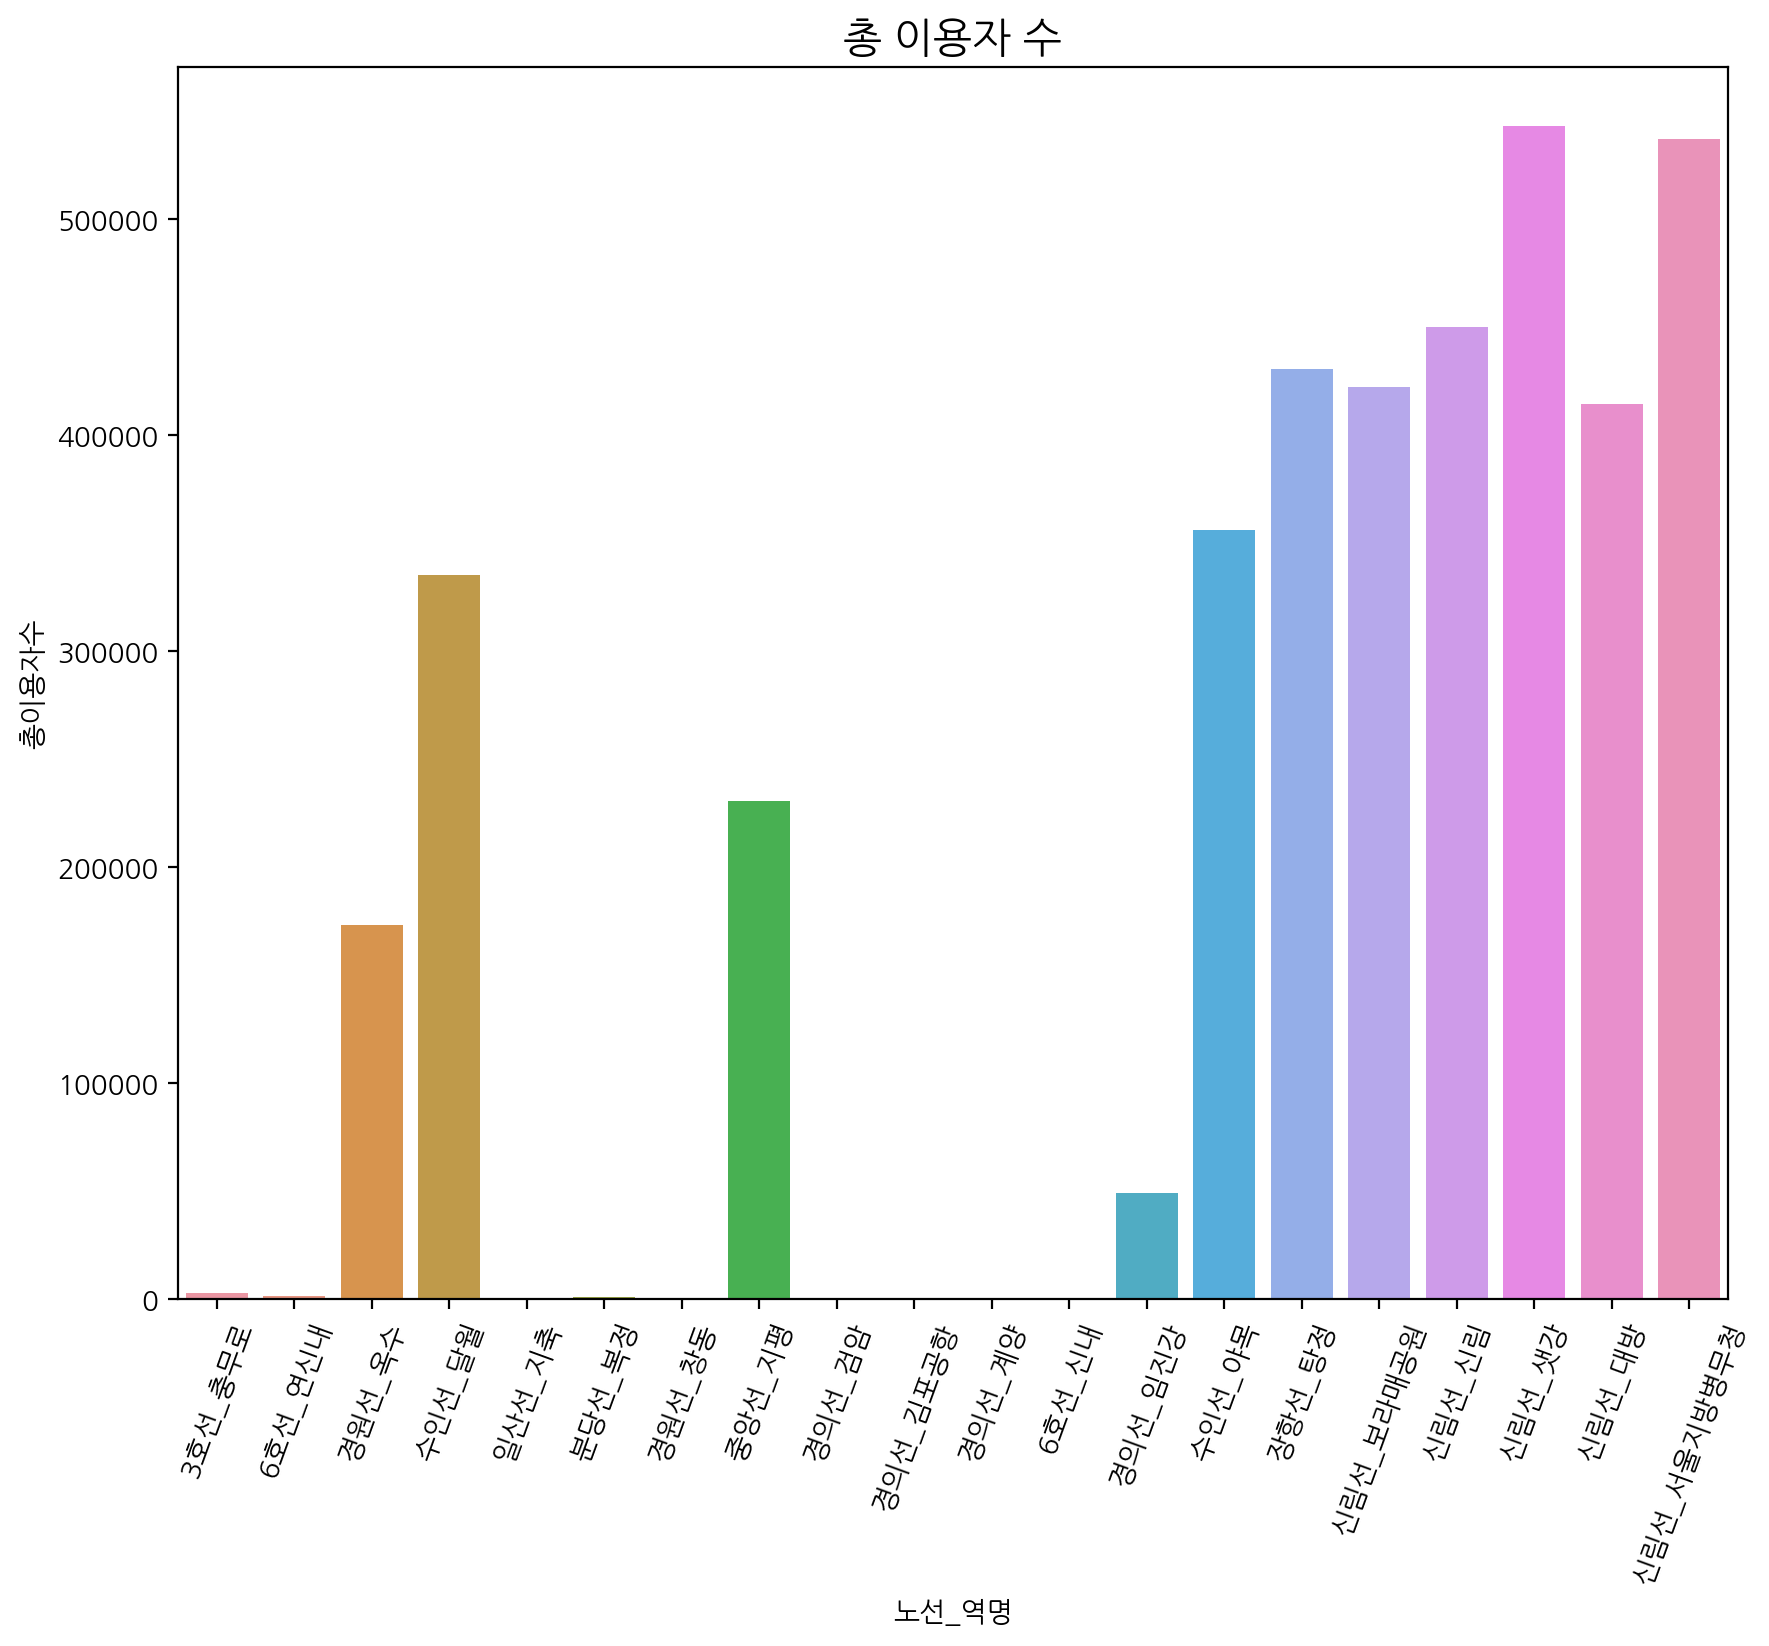

In [34]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=70)
plt.title('총 이용자 수',fontsize=15)
sns.barplot(data=df_bottom20, x='노선_역명', y='총이용자수',ci=None,estimator=sum)

<AxesSubplot:title={'center':'각 지하철역의 요일별 승객수 (단위 : 만명)'}, xlabel='요일', ylabel='노선_역명'>

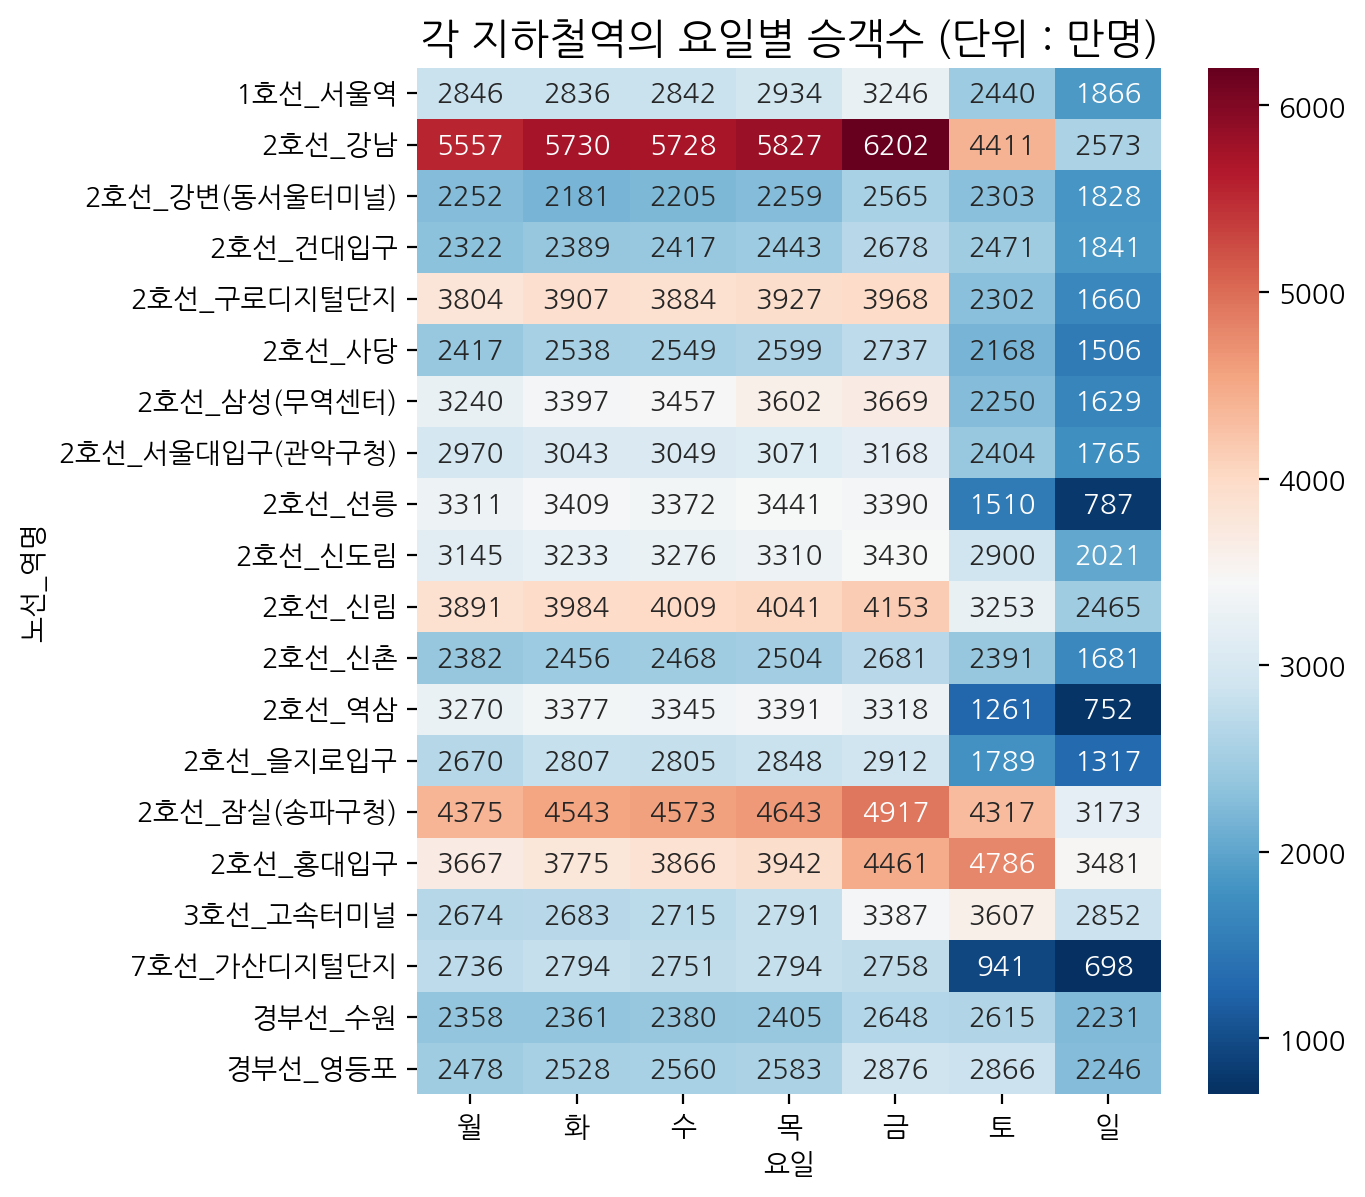

In [36]:
df_pivot = df_top20.pivot_table(index = ['노선_역명'], columns = '요일', values = '총이용자수',aggfunc = 'sum')
df_pivot = df_pivot[['월','화','수','목','금','토','일']]
df_pivot = df_pivot / 10000  # 만명단위로 수정
    
# 그래프 그리기
fig, ax = plt.subplots( figsize=(6,len(df_pivot)/3 ) )   
                                            # 그래프 사이즈를 조정하여, 역 수가 많은 경우는 세로를 길게 표현. 
plt.title(f"각 지하철역의 요일별 승객수 (단위 : 만명)", fontsize = 15) # for title
sns.heatmap(df_pivot, cmap = "RdBu_r", annot = True, fmt = '.0f')

<AxesSubplot:title={'center':'각 지하철역의 요일별 승객수 (단위 : 명)'}, xlabel='요일', ylabel='노선_역명'>

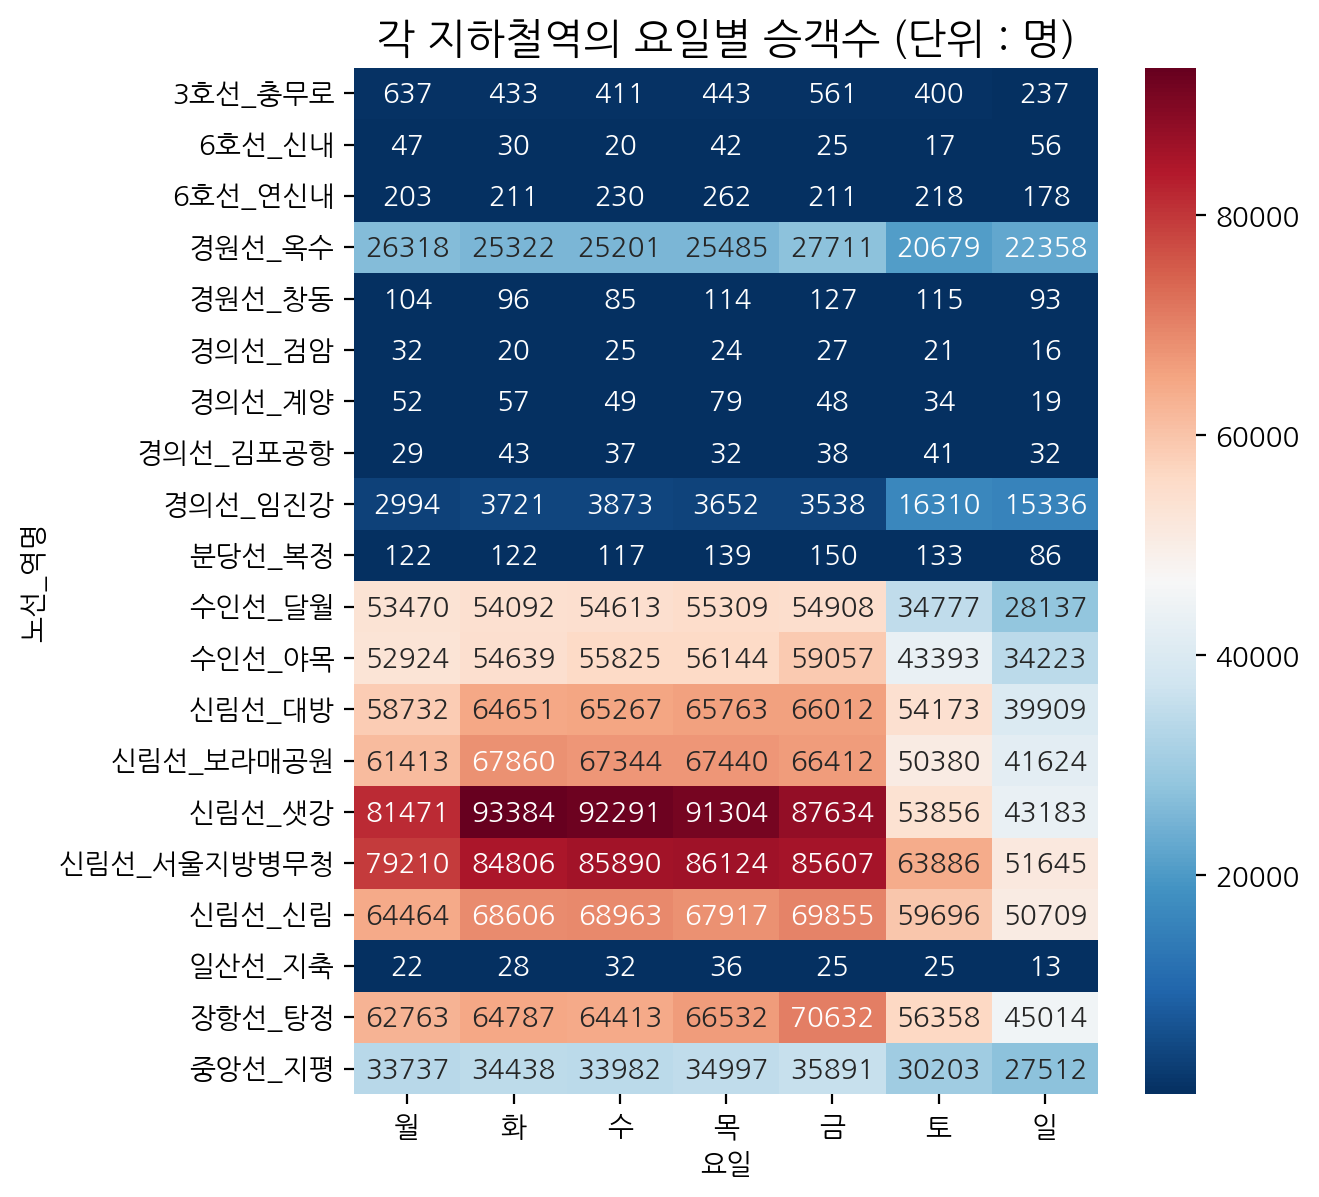

In [39]:
df_pivot = df_bottom20.pivot_table(index = ['노선_역명'], columns = '요일', values = '총이용자수',aggfunc = 'sum')
df_pivot = df_pivot[['월','화','수','목','금','토','일']]
    
# 그래프 그리기
fig, ax = plt.subplots( figsize=(6,len(df_pivot)/3 ) )   
                                            # 그래프 사이즈를 조정하여, 역 수가 많은 경우는 세로를 길게 표현. 
plt.title(f"각 지하철역의 요일별 승객수 (단위 : 명)", fontsize = 15) # for title
sns.heatmap(df_pivot, cmap = "RdBu_r", annot = True, fmt = '.0f')

- 노선은 다른데 역명이 같은 데이터가 있음. 
    - 이 경우에 어떻게 처리해줘야할지 .. ?

In [44]:
print('환승가능노선 ')
for i in df_station:
    name_cnt = df_top20[df_top20['역명'] == i]['노선명'].unique()
    if len(name_cnt) > 1 :
        print(f'{i} : {name_cnt}')

환승가능노선 


In [41]:
print('환승가능노선 ')
for i in df_station_l:
    name_cnt = df_bottom20[df_bottom20['역명'] == i]['노선명'].unique()
    if len(name_cnt) > 1 :
        print(f'{i} : {name_cnt}')

환승가능노선 


-> 겹치는 노선 처리 완료

## 서울시 따릉이 데이터 수요 변화

In [53]:
df_bike = pd.read_csv('dataset/bike_sharing_concat.csv', index_col = 0 )
df_bike

,사용월,대여소명,대여건수
0,2017-01,서교동 사거리,246.0
1,2017-01,더샵스타시티 C동 앞,246.0
2,2017-01,신자초교입구교차로,232.0
3,2017-01,자양사거리 광진아크로텔 앞,302.0
4,2017-01,금호 어울림 아파트 앞,72.0
...,...,...,...
111444,2022-06,207. 여의나루역 1번출구 앞,13595.0
111445,2022-06,2102. 봉림교 교통섬,13722.0
111446,2022-06,502. 뚝섬유원지역 1번출구 앞,14125.0
111447,2022-06,4217. 한강공원 망원나들목,15417.0


In [54]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111449 entries, 0 to 111448
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용월     111449 non-null  object 
 1   대여소명    111414 non-null  object 
 2   대여건수    111444 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.4+ MB


In [57]:
df_bike

,사용월,대여소명,대여건수
0,2017-01,서교동 사거리,246.0
1,2017-01,더샵스타시티 C동 앞,246.0
2,2017-01,신자초교입구교차로,232.0
3,2017-01,자양사거리 광진아크로텔 앞,302.0
4,2017-01,금호 어울림 아파트 앞,72.0
...,...,...,...
111444,2022-06,207. 여의나루역 1번출구 앞,13595.0
111445,2022-06,2102. 봉림교 교통섬,13722.0
111446,2022-06,502. 뚝섬유원지역 1번출구 앞,14125.0
111447,2022-06,4217. 한강공원 망원나들목,15417.0


In [60]:
df_bike = df_bike.dropna()

In [83]:
df_bike['사용월'] = pd.to_datetime(df_bike['사용월']).dt.strftime('%Y-%m')
df_bike['연도'] = df_bike['사용월'].map(lambda x : int(x[:4]))
df_bike['월'] = df_bike['사용월'].map(lambda x : int(x[5:]))

C:\Users\sanga\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sanga\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sanga\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [84]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111414 entries, 0 to 111448
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용월     111414 non-null  object 
 1   대여소명    111414 non-null  object 
 2   대여건수    111414 non-null  float64
 3   연도      111414 non-null  int64  
 4   월       111414 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 9.1+ MB


In [85]:
df_bike

,사용월,대여소명,대여건수,연도,월
0,2017-01,서교동 사거리,246.0,2017,1
1,2017-01,더샵스타시티 C동 앞,246.0,2017,1
2,2017-01,신자초교입구교차로,232.0,2017,1
3,2017-01,자양사거리 광진아크로텔 앞,302.0,2017,1
4,2017-01,금호 어울림 아파트 앞,72.0,2017,1
...,...,...,...,...,...
111444,2022-06,207. 여의나루역 1번출구 앞,13595.0,2022,6
111445,2022-06,2102. 봉림교 교통섬,13722.0,2022,6
111446,2022-06,502. 뚝섬유원지역 1번출구 앞,14125.0,2022,6
111447,2022-06,4217. 한강공원 망원나들목,15417.0,2022,6


<AxesSubplot:title={'center':'서울시 공공자전거 이용자 수 변화'}, xlabel='월', ylabel='대여건수'>

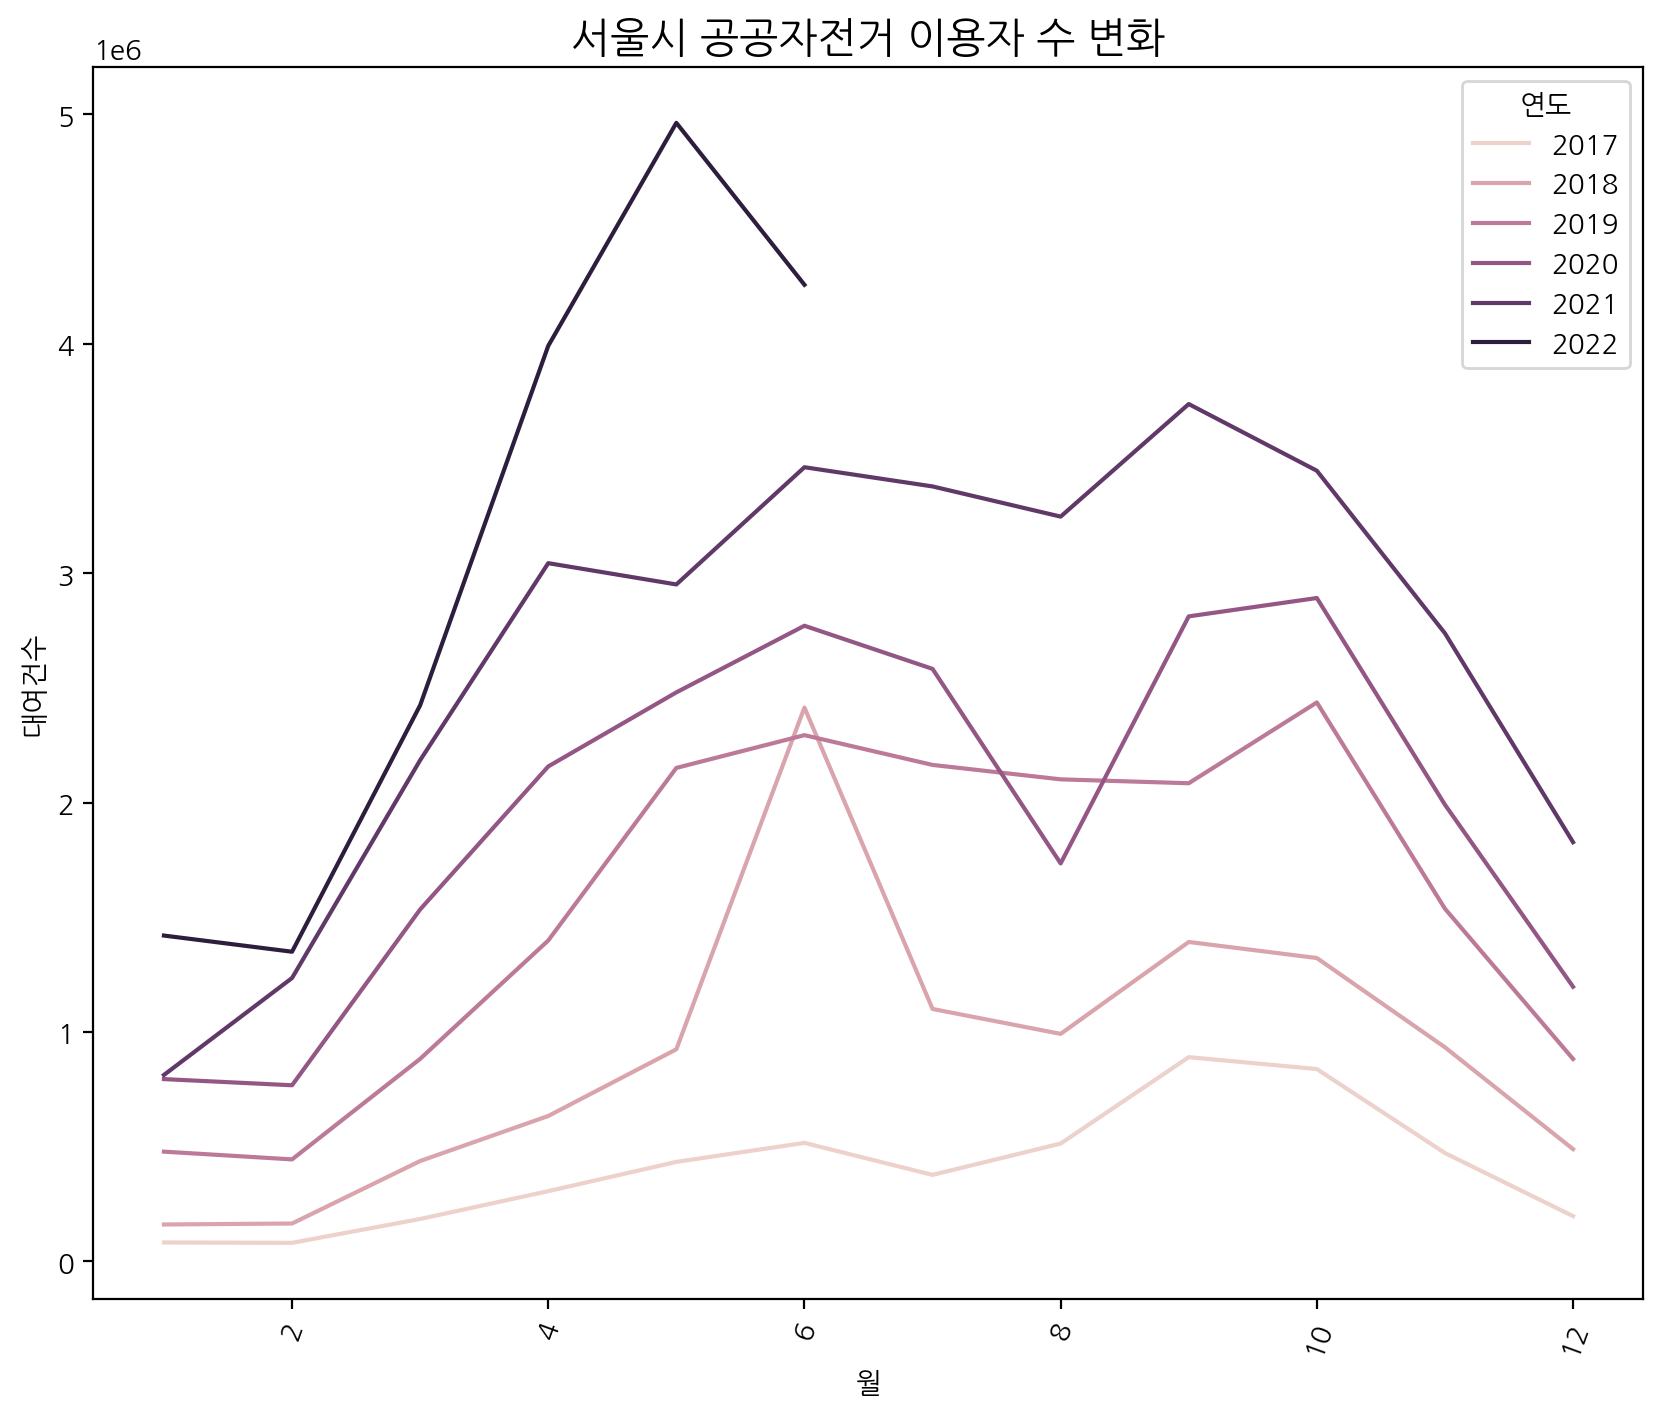

In [90]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=70)
plt.title('서울시 공공자전거 이용자 수 변화',fontsize=15)
sns.lineplot(data=df_bike, x='월', y='대여건수',hue='연도',ci=None,estimator=sum)

In [103]:
df_bike['누적대여건수'] = df_bike['대여건수'].cumsum()
df_all = df_bike.groupby('사용월')[['대여건수','누적대여건수']].sum()
df_all

C:\Users\sanga\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,대여건수,누적대여건수
사용월,,
2017-01,81886.0,19049441.0
2017-02,80239.0,54984641.0
2017-03,184188.0,114024808.0
2017-04,305589.0,245328292.0
2017-05,433161.0,487846161.0
...,...,...
2022-02,1349521.0,239405928525.0
2022-03,2424115.0,244952031588.0
2022-04,3991127.0,251939750584.0


<AxesSubplot:xlabel='사용월'>

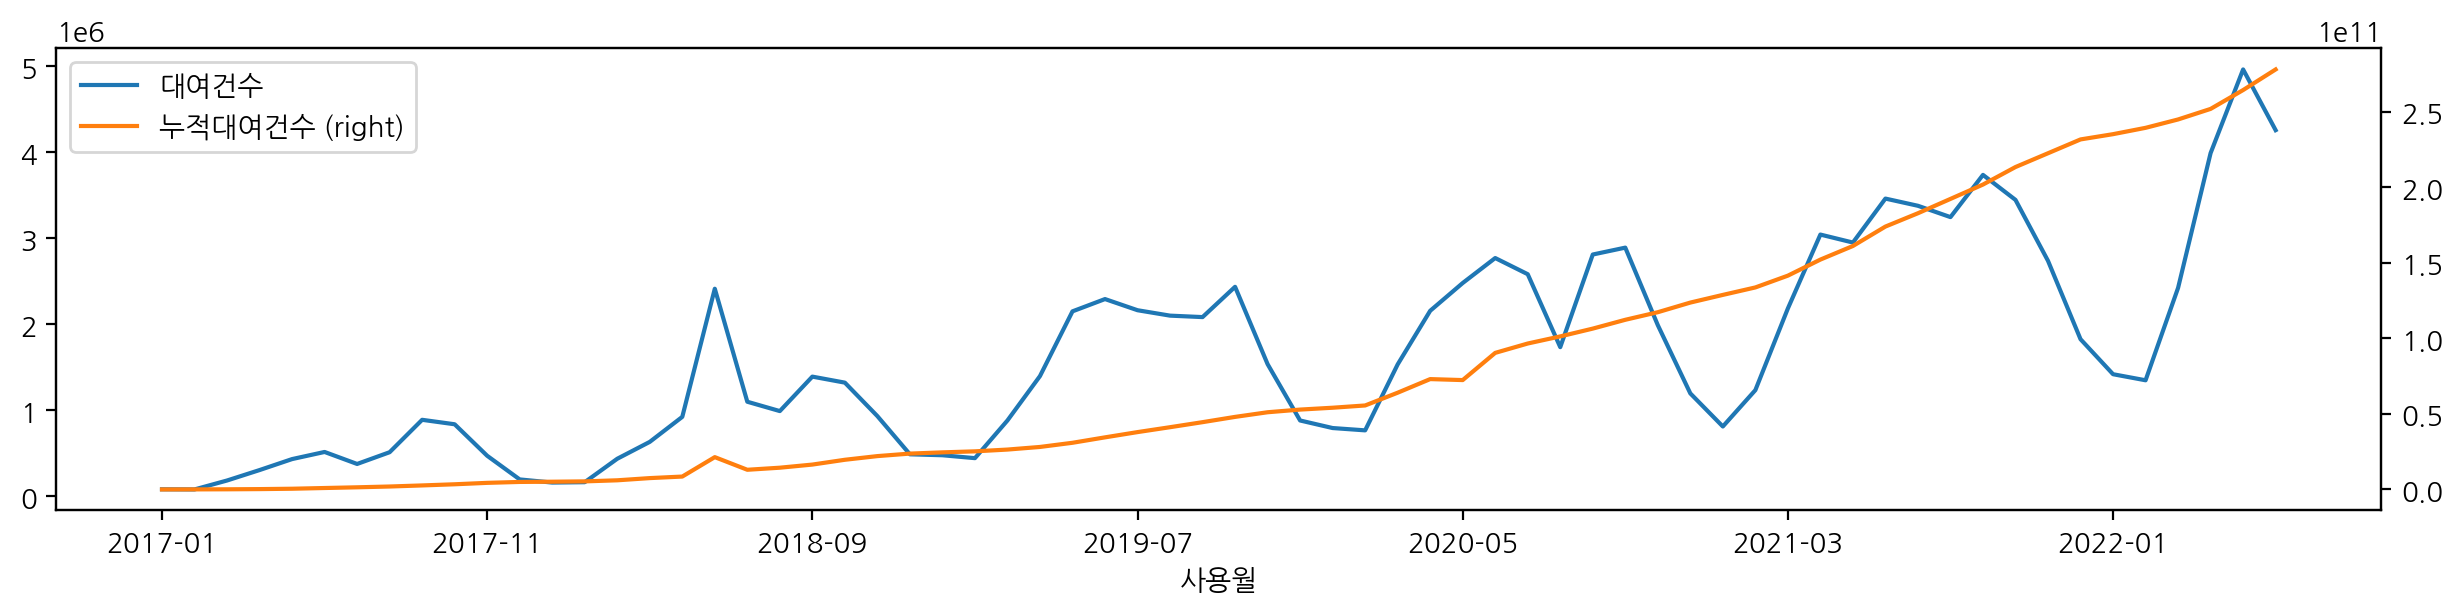

In [107]:
df_all.plot(secondary_y='누적대여건수', figsize=(15,3))

In [ ]:
df 